# Sampling and Windowing

The code shown below plots normalized FFT of a sinusoidal test signal sampled by an ideal uniform sampler. The code ensures that coherent testing condition is satisfied to avoid spectral leakage.

Study the code very well and make sure you understand every line.

In [1]:
# importing liberaries 
import numpy as np
import matplotlib.pyplot as plt
from math import pi 

In [2]:
Fs = 4e6                    # Sampling Frequency = 4 MHz
AFS = 1                     # Full_scale input amplitude = 1
N = 2**7                    # Number of samples = 128 samples from 0 to fs
Fin_required = 250e3        # Required input freq = 250 kHz 

In [3]:
# Writing used matlab functions in python
def primes(N):
    """
    Returns the prime numbers in the range of 2 to N where N is a +ve number
    """
    N = int(N)
    prime = []
    for n in range(2, N):
        if not np.any([n%i == 0 for i in range(2, n)]):
            prime.append(n)
    return prime

def gcd(a, b):
    """
    Returns the great common divisor of two numbers (a and b)
    """
    if a == 0 :
        return b 
    return gcd(b%a, a)

def find(List,N_samples):
    temp = []
    for n in List:
        if gcd(n,N_samples) == 1:
            temp.append(n)
    return temp[-1]

In [4]:
# Ncyc Must be prime and gcd(Ncyc,N) = 1
Ncyc = N*Fin_required/Fs
if Ncyc < 3:
    Ncyc = 3
else:
    Ncyc_primes = primes(Ncyc)
    Ncyc = find(Ncyc_primes,N)

In [5]:
Fin = Fs*Ncyc/N
print("Acheived Fin:",Fin/1e3, "kHz")

Acheived Fin: 218.75 kHz


In [6]:
t = np.linspace(0, (N-1)/Fs, N)
y = AFS * np.cos(2*pi*Fin*t)                     # Sinusoidal input signal 

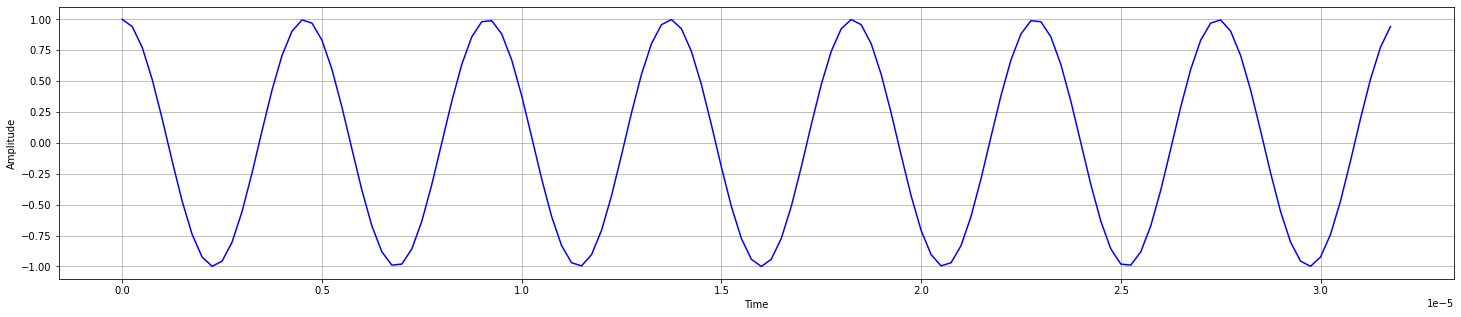

In [7]:
plt.figure(figsize=(25, 5));
plt.plot(t, y, 'b');
plt.grid()
plt.xlabel("Time");
plt.ylabel("Amplitude");

In [8]:
AFS_rms = AFS / np.sqrt(2)  
S = 20 * np.log10(abs(np.fft.fft(y)/N/AFS*2))    # Spectral density
S = S[:int(N/2)]                                 # Drop redundant half
F = np.array(range(0,(len(S)))) / N              # Normalized freq vector 
t2 = t + max(t) + 1/Fs
s = max(S[S != 0])

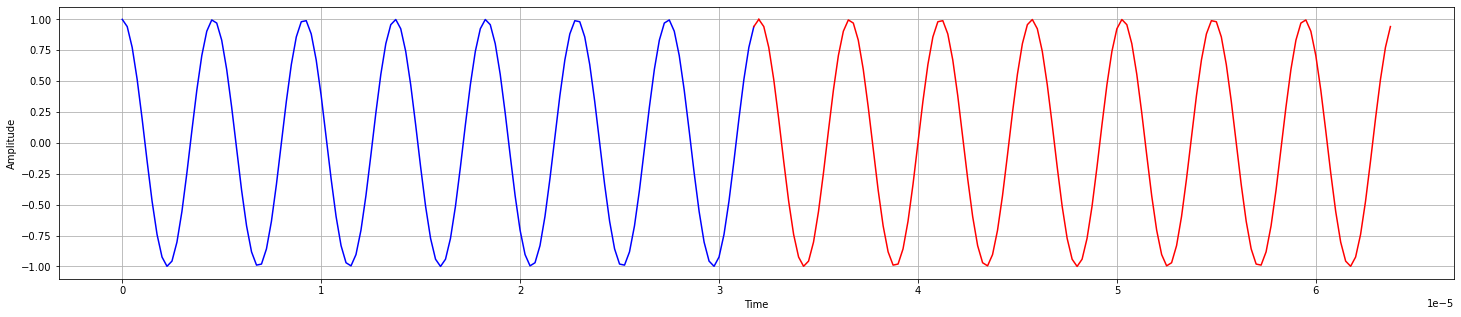

In [9]:
plt.figure(figsize=(25, 5));
plt.plot(t, y, 'b', t2, y, 'r', [t[-1], t2[0]], [y[-1], y[0]], 'r');
# the additional cycle to show the continuity
plt.grid()
plt.xlabel("Time");
plt.ylabel("Amplitude");

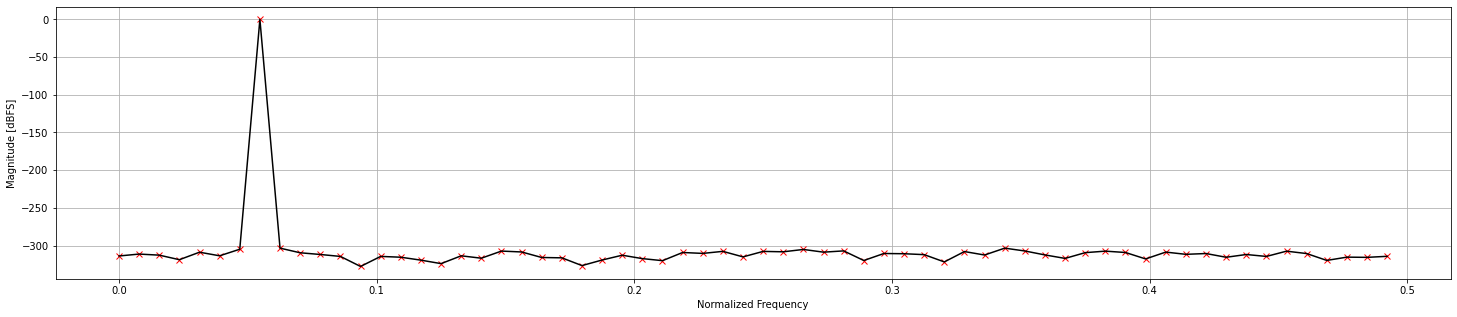

In [10]:
plt.figure(figsize=(25, 5));
plt.plot(F, S, 'rx');
plt.plot(F, S, 'k');
plt.grid()
plt.xlabel("Normalized Frequency");
plt.ylabel("Magnitude [dBFS]");

Acheived Fin: 234.375 kHz


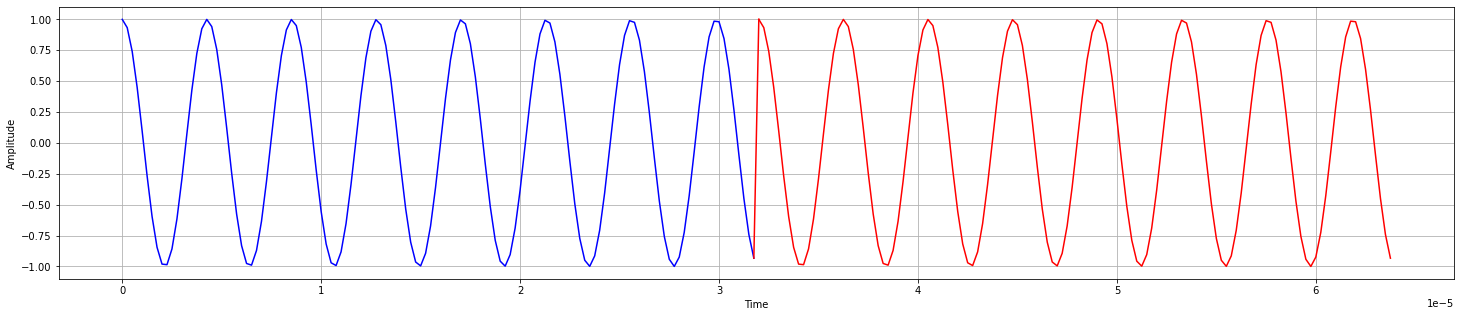

In [11]:
Ncyc_leak = Ncyc + 0.5
Fin = Fs*Ncyc_leak/N
print("Acheived Fin:",Fin/1e3, "kHz")
t = np.linspace(0, (N-1)/Fs, N)
y = AFS * np.cos(2*pi*Fin*t)                     # Sinusoidal input signal 
plt.figure(figsize=(25, 5));
# the additional cycle to show the continuity
plt.plot(t, y, 'b', t2, y, 'r', [t[-1], t2[0]], [y[-1], y[0]], 'r');
plt.grid()
plt.xlabel("Time");
plt.ylabel("Amplitude");

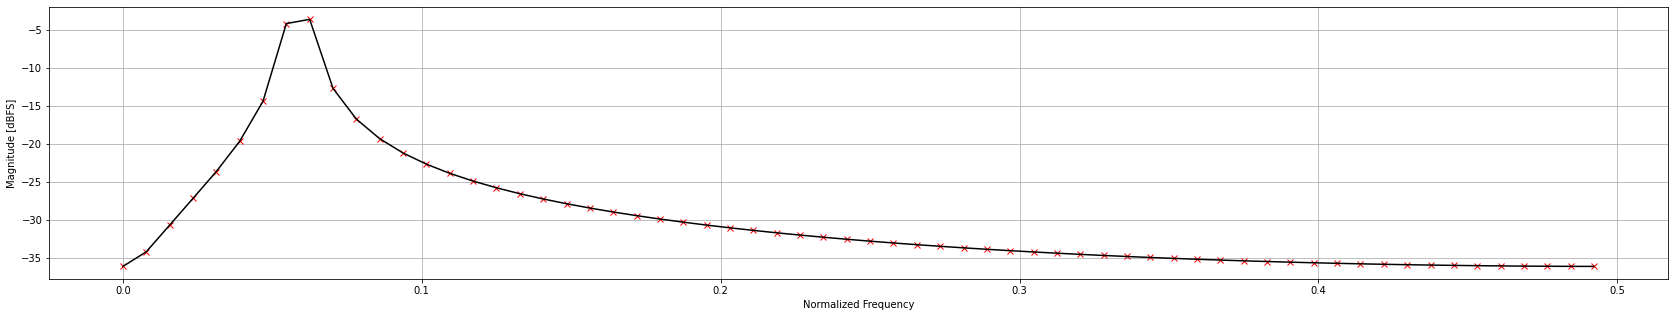

In [12]:
AFS_rms = AFS / np.sqrt(2)                       
S = 20 * np.log10(abs(np.fft.fft(y)/N/AFS*2))    # Spectral density
S = S[:int(N/2)]                                 # Drop redundant half
F = np.array(range(0,(len(S)))) / N              # Normalized freq vector 
t2 = t + max(t) + 1/Fs
plt.figure(figsize=(29, 5));
plt.plot(F, S, 'rx');
plt.plot(F, S, 'k');
plt.grid()
plt.xlabel("Normalized Frequency");
plt.ylabel("Magnitude [dBFS]");